In [1]:
%matplotlib inline
%load_ext autoreload      
%autoreload 2     

import sys
import copy
import numpy as np
from numpy import sqrt, pi, exp, cos, sin
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable

sys.path.append("../")
from qo_simulator_1ph import QOsimulator_1ph as QOsimulator
sys.path.append("../lib/")
from _qo_simulator import _QOsimulator
path_to_qo_object = "../qo_object/"
sys.path.append(path_to_qo_object)
from qo_object import QOobject, Mirror, BeamSplitter, PolarizationRotator
path_to_qo_beam = "../qo_beam/"
sys.path.append(path_to_qo_beam)
from qo_beam import QObeam

In [2]:
## set parameters
N       = (2*256, 256)     # number of grid in the x and y directions
L       = (2*10*pi, 10*pi) # Size of space in the x and y dicrections
## Photon parameters
x0      = 2.0      # initial position x
y0      = L[1]/2 - 1.*0.06159985595274104   # initial position y
kx0     = 10.0     # center of initial k-space distribution (k_x axis)
ky0     = 0.0      # center of initial k-space distribution (k_y axis)
sigma_x = 2.0
sigma_y = 2.0
##
dt      = 0.1  
t_max   = 55
n_divide= 5

In [3]:
beam = QObeam(N, L, x0, y0, kx0, ky0,sigma_x, sigma_y)

# Create QOobject

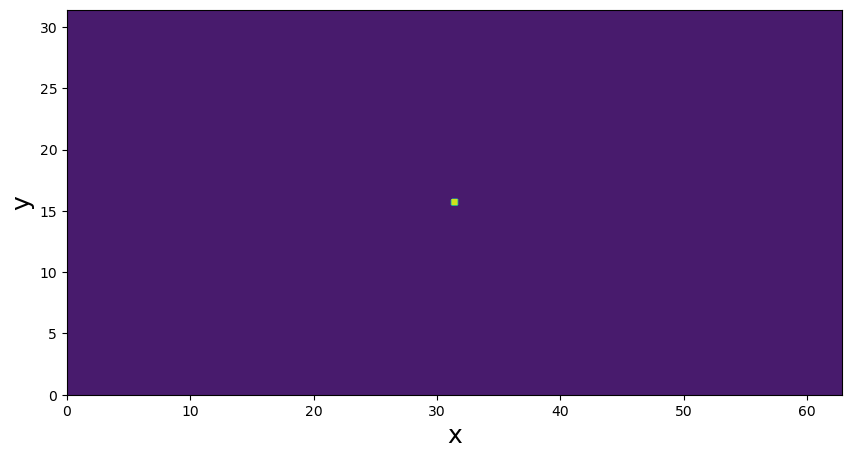

In [5]:
layer=4
NA=layer*layer
Dj=1
omega_j=5.0
center_nx = int(N[0]/2 -0)
center_ny = int(N[1]/2 +0)
theta = 90
##
obj = QOobject(NA, layer, Dj, omega_j, N, L, center_nx, center_ny, angle=theta, which_pol=False)
obj.show()

# Mainroutine

In [6]:
interval_of_cf = np.linspace(0,0.0005,11)

def gen_show_tlist(t_max, n_divide):
    tlist = []
    for i in range(int(t_max/dt)+1):
        t = i*dt
        tlist.append(t)
    res = [ elem[0] for elem in np.array_split(tlist, n_divide)]
    res.append(tlist[-1]) # 最後の時間は出力しておく
    return  res

def show_info(qosim,  phi, t):
    print("#------- t=", round(t,3))
    prob_ph=phi.ph.probability()
    prob_A = phi.A.probability()
    print("|c_ph|^2, |c_A|^2 = ",  round(prob_ph,5), round(prob_A,5) )
    print("sum |c|^2=", round(prob_ph+prob_A, 5))
    # Energy
    eF=qosim.calc_EF(phi)
    eA=qosim.calc_EA(phi)
    eI=qosim.calc_EI(phi)
    econst=qosim.calc_Econst()
    print("E_F, E_A, E_I, econst =", round(eF,5), round(eA,5), round(eI,5), round(econst,5))
    print("Total energy = ", round(eF + eA + eI + econst, 5))
    print("Total energy - econst = ", round(eF + eA + eI, 5))
    ## Check sum of photon number density
    density = phi.ph.partial_density(_in="r")
    mat = np.zeros((qosim.N[0], qosim.N[1]))
    for idx in obj.atom_pos_indices:
        mat[idx[0],idx[1]] = 1
    mat = mat + detect_mat(N,80,40)            
    im, title = qosim.show(density, t, levels=interval_of_cf, extend="both")
    plt.contour(qosim.qosim_1ph.x, qosim.qosim_1ph.y, mat.T, colors="gray")
    plt.title("t=%.2f" % t, fontsize=18)
    plt.show()
    return im, title

show_tlist = gen_show_tlist(t_max, n_divide=n_divide)

In [7]:
def detect_mat(N,h,w):
    mat = np.zeros(N)
    for i in range(N[0]):
        for j in range(N[1]):
            if i>N[0]-h and j>0.5*N[1]-w and j<0.5*N[1]+w:
                mat[i,j] = 1.0
    return mat

#------- t= 0
|c_ph|^2, |c_A|^2 =  1.0 0.0
sum |c|^2= 1.0
E_F, E_A, E_I, econst = 10.00625 0.0 0.0 -80.0
Total energy =  -69.99375
Total energy - econst =  10.00625


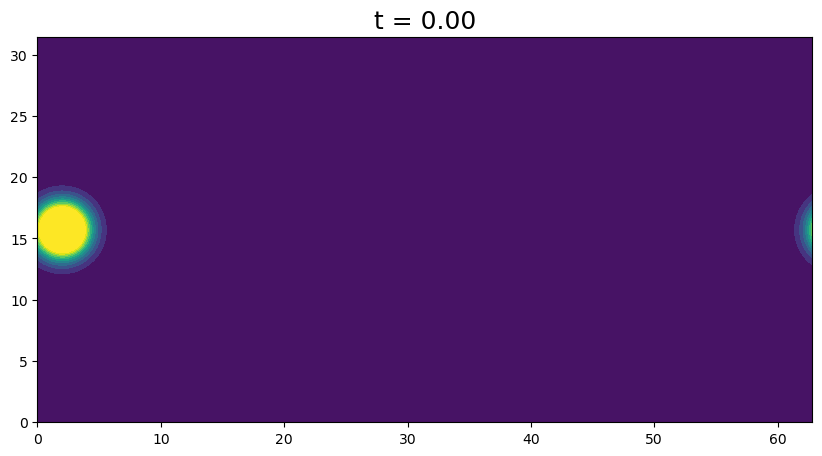

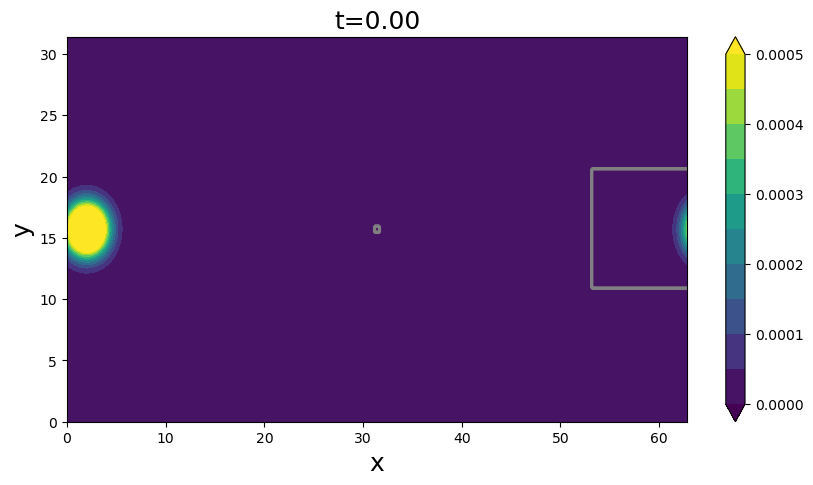

(<matplotlib.contour.QuadContourSet at 0x11c9bc6d0>,
 Text(0.5, 1.01, 't = 0.00'))

In [8]:
qosim = QOsimulator(N, L, dt, beam = beam, objects=[obj])
init_phi = qosim.gen_initial_state()
show_info(qosim, init_phi, t=0)

#------- t= 0.0
|c_ph|^2, |c_A|^2 =  1.0 0.0
sum |c|^2= 1.0
E_F, E_A, E_I, econst = 10.00625 0.0 0.0 -80.0
Total energy =  -69.99375
Total energy - econst =  10.00625


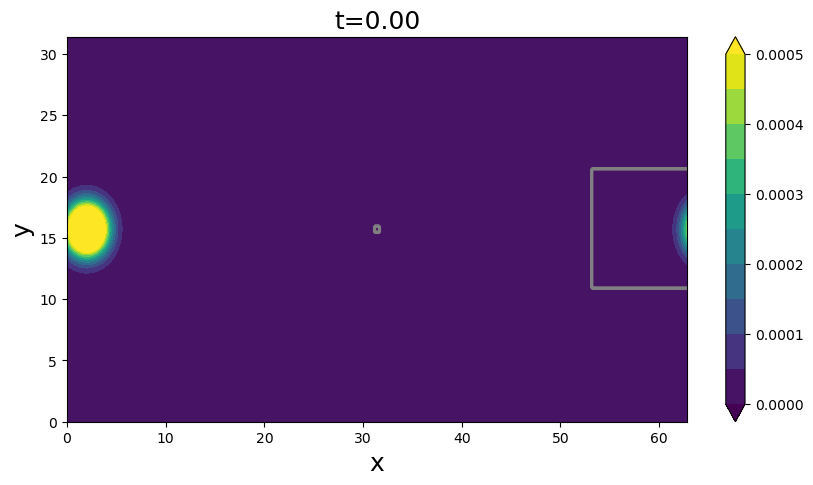

#------- t= 11.1
|c_ph|^2, |c_A|^2 =  1.0 0.0
sum |c|^2= 1.0
E_F, E_A, E_I, econst = 10.00625 0.0 -0.0 -80.0
Total energy =  -69.99375
Total energy - econst =  10.00625


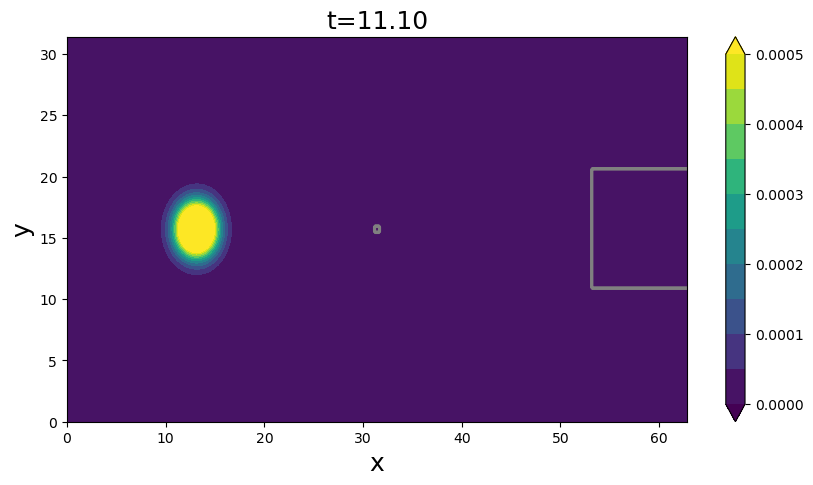

#------- t= 22.1
|c_ph|^2, |c_A|^2 =  1.0 0.0
sum |c|^2= 1.0
E_F, E_A, E_I, econst = 10.00625 0.0 0.0 -80.0
Total energy =  -69.99375
Total energy - econst =  10.00625


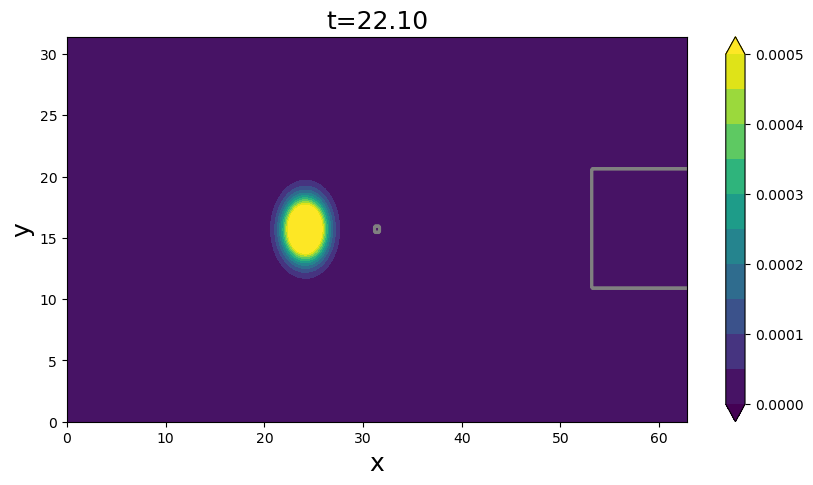

#------- t= 33.1
|c_ph|^2, |c_A|^2 =  0.99995 5e-05
sum |c|^2= 1.0
E_F, E_A, E_I, econst = 10.00573 0.00049 0.0 -80.0
Total energy =  -69.99378
Total energy - econst =  10.00622


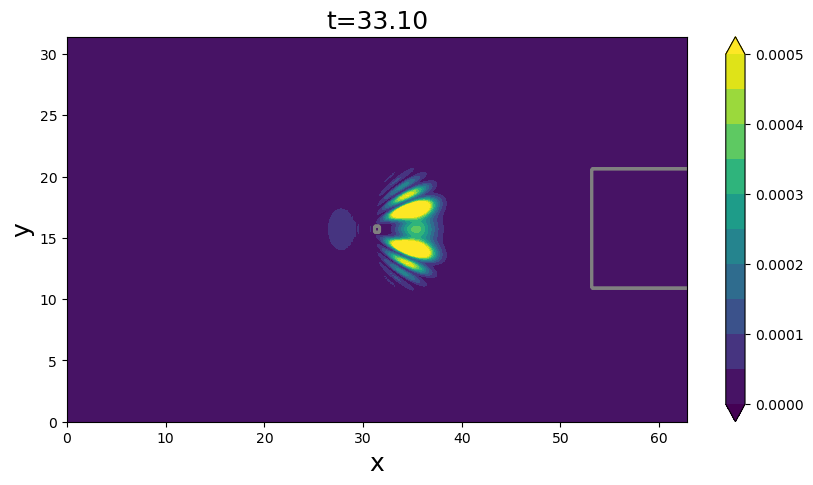

#------- t= 44.1
|c_ph|^2, |c_A|^2 =  1.0 0.0
sum |c|^2= 1.0
E_F, E_A, E_I, econst = 10.00625 0.0 -0.0 -80.0
Total energy =  -69.99375
Total energy - econst =  10.00625


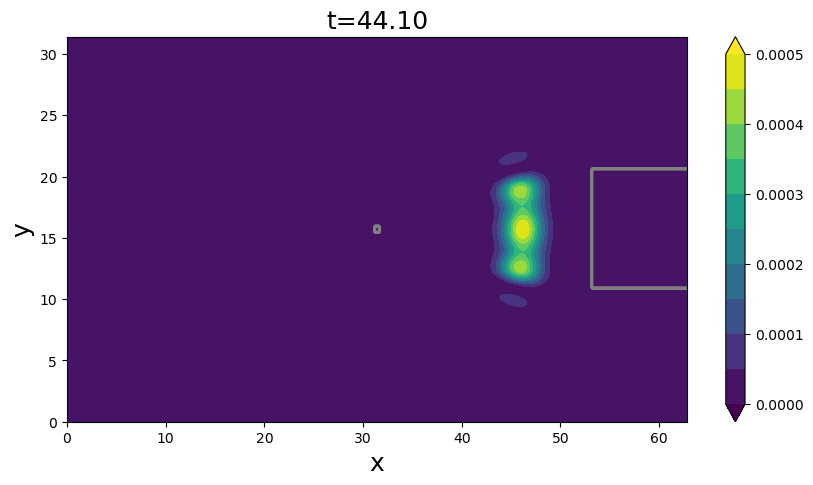

#------- t= 55.0
|c_ph|^2, |c_A|^2 =  1.0 0.0
sum |c|^2= 1.0
E_F, E_A, E_I, econst = 10.00625 0.0 -0.0 -80.0
Total energy =  -69.99375
Total energy - econst =  10.00625


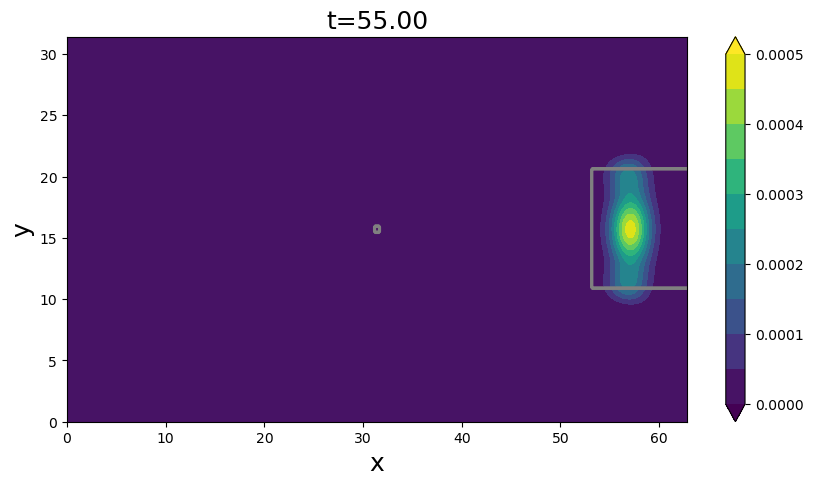

CPU times: user 4.81 s, sys: 434 ms, total: 5.24 s
Wall time: 5.24 s


In [9]:
%%time
for i in range(int(t_max/dt)+1):
    t = i*dt
    if i == 0:
        phi = copy.deepcopy(init_phi)
    else:
        phi = qosim.suzuki_trotter_step(phi)
    ##
    if t in show_tlist:
        im, title = show_info(qosim, phi, t)    

# Error rate calculation

CPU times: user 5.72 s, sys: 235 ms, total: 5.96 s
Wall time: 5.95 s


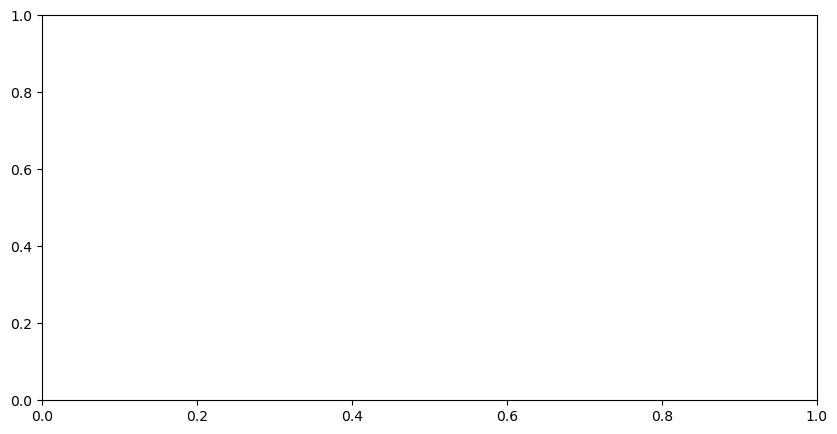

In [10]:
%%time
widths=np.arange(10, 60+1)
err_list_free=[]

## Initialization
qosim = QOsimulator(N, L, dt, beam = beam, objects=[])
init_phi = qosim.gen_initial_state()

## Time evolution
for i in range(int(t_max/dt)+1):
    t = i*dt
    if i == 0:
        phi = copy.deepcopy(init_phi)
    else:
        phi = qosim.suzuki_trotter_step(phi)

## Error rate
for wid in widths:
    mat = detect_mat(N,80,wid)
    density = phi.ph.partial_density(_in="r")
    masked_density = mat*density
    err_list_free.append(1-np.sum(masked_density))

err_list_free = np.array(err_list_free)

CPU times: user 40.7 s, sys: 3.14 s, total: 43.9 s
Wall time: 43.9 s


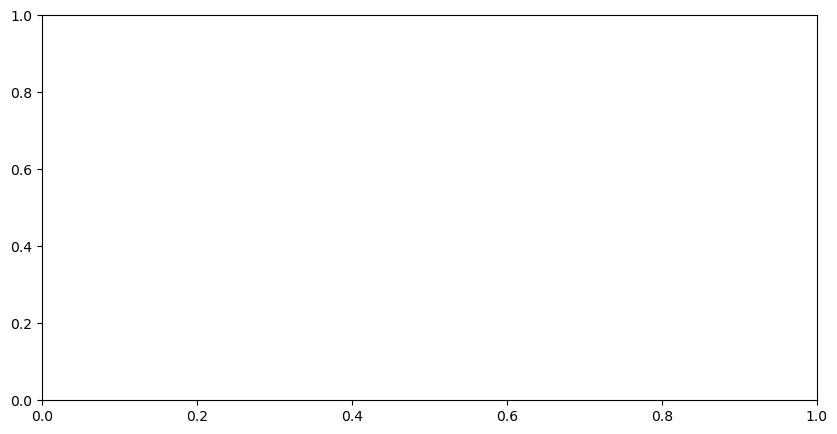

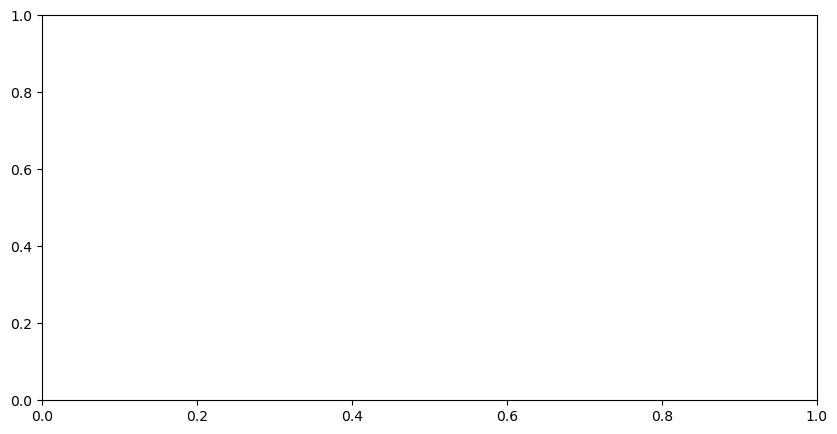

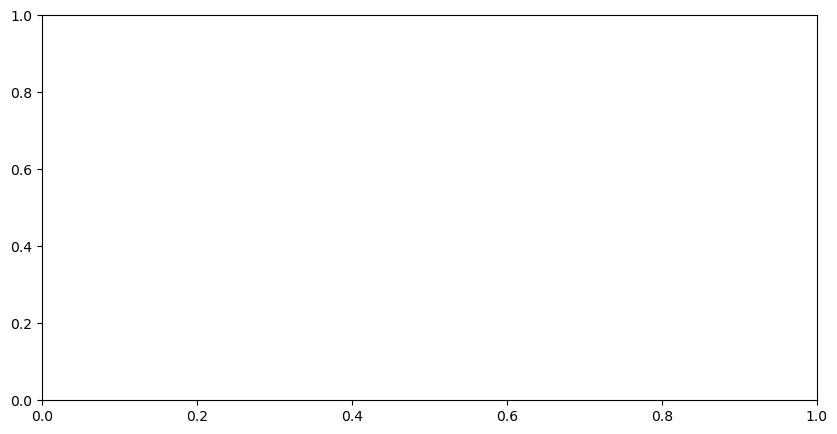

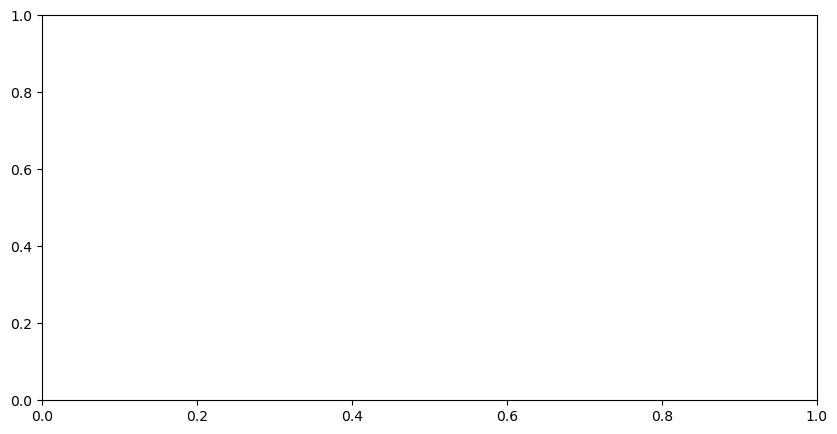

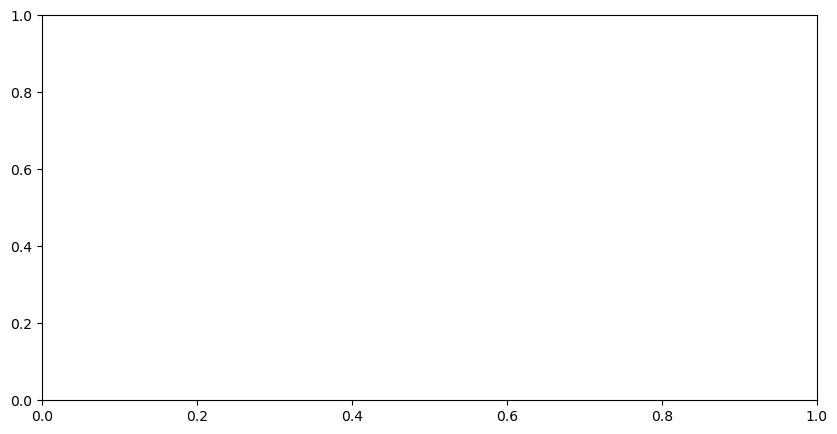

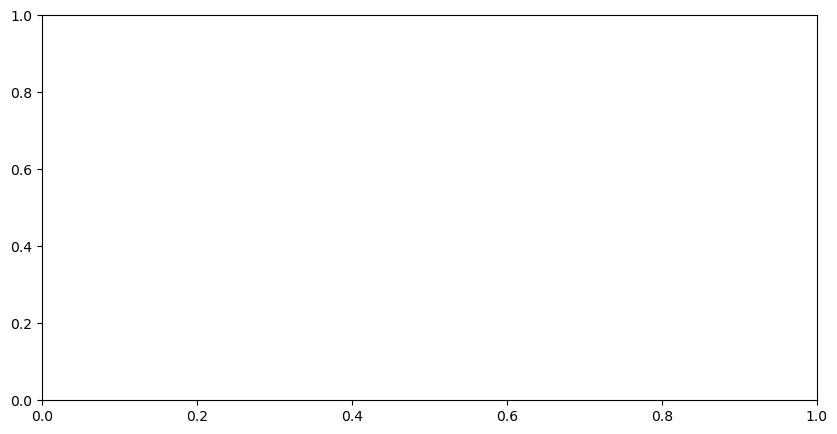

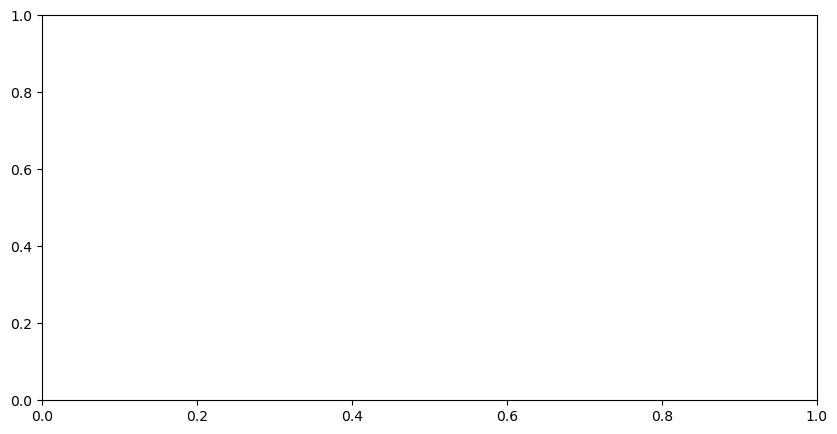

In [14]:
%%time
layer=4
dnx=dny=0
dnxs=[-60,-30,0,30,60,90,120]
widths=np.arange(10, 60+1)
for j, dnx in enumerate(dnxs):
    exec("err_list{}=[]".format(j))
    ## Configurate dust object
    NA=layer*layer
    center_nx = int(N[0]/2 +dnx)
    center_ny = int(N[1]/2 +dny)
    obj = QOobject(NA, layer, Dj, omega_j, N, L, center_nx, center_ny, angle=90)

    ## Initialization
    qosim = QOsimulator(N, L, dt, beam=beam, objects=[obj])
    init_phi = qosim.gen_initial_state()

    ## Time evolution
    for i in range(int(t_max/dt)+1):
        t = i*dt
        if i == 0:
            phi = copy.deepcopy(init_phi)
        else:
            phi = qosim.suzuki_trotter_step(phi)

    ## Error rate
    for wid in widths:
        mat = detect_mat(N,80,wid)
        density = phi.ph.partial_density(_in="r")
        masked_density = mat*density
        exec("err_list{}.append({})".format(j,1-np.sum(masked_density)))

    exec("err_list{} = np.array(err_list{})".format(j,j))

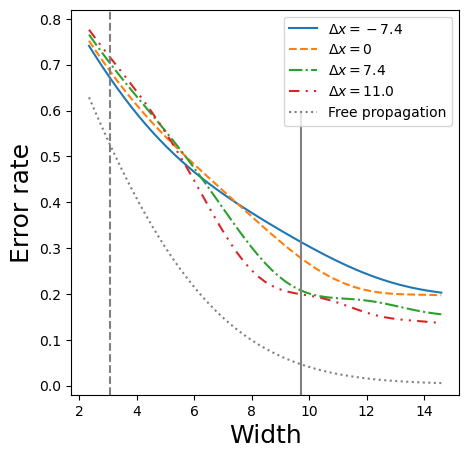

In [15]:
plt.figure(figsize=(5,5))
widths_r = (2*widths-1) / N[0]*L[0]
plt.plot(widths_r, err_list0, label=r"$\Delta x = -7.4$")
# plt.plot(widths_r, err_list1, label=r"$\Delta x = -3.7$")
plt.plot(widths_r, err_list2, ls="--", label=r"$\Delta x = 0$")
# plt.plot(widths_r, err_list3, label=r"$\Delta x = 3.7$")
plt.plot(widths_r, err_list4, ls="-.", label=r"$\Delta x = 7.4$")
plt.plot(widths_r, err_list5, ls=(0, (5, 3, 1, 3, 1, 3)), label=r"$\Delta x = 11.0$")
# plt.plot(widths_r, err_list6, label=r"$\Delta x = 14.7$")
##
plt.plot(widths_r, err_list_free, ls=":", c="gray", label="Free propagation")
##
plt.vlines(3.07,-0.02,0.82, color="gray", ls="--")
plt.vlines(9.7,-0.02,0.6, color="gray", ls="-")
plt.ylim(-0.02,0.82)
plt.xlabel("Width", fontsize=18)
plt.ylabel("Error rate", fontsize=18)
plt.legend()
# plt.savefig("fig/err_rate_diff_Nx_at_Ny0.eps", bbox_inches="tight")

CPU times: user 29 s, sys: 1.01 s, total: 30 s
Wall time: 30 s


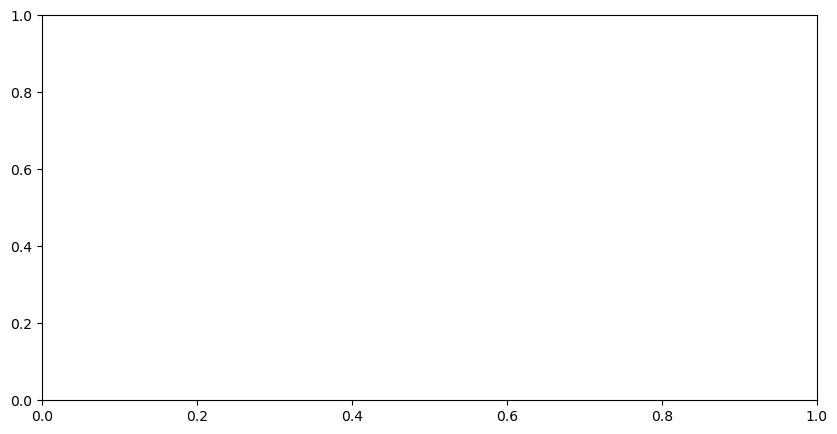

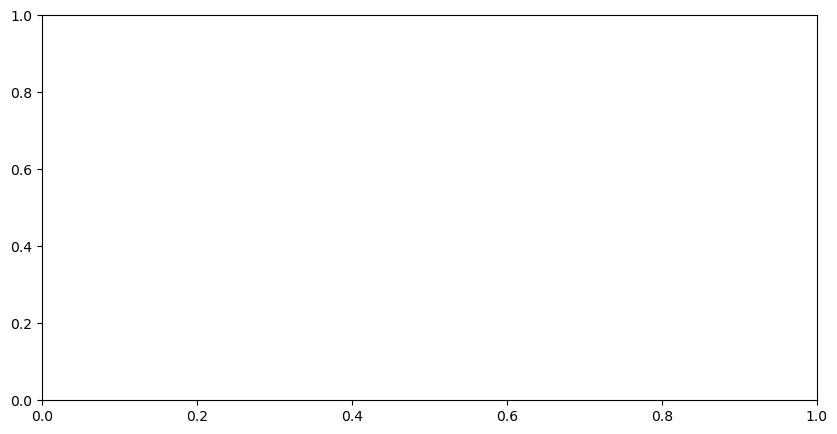

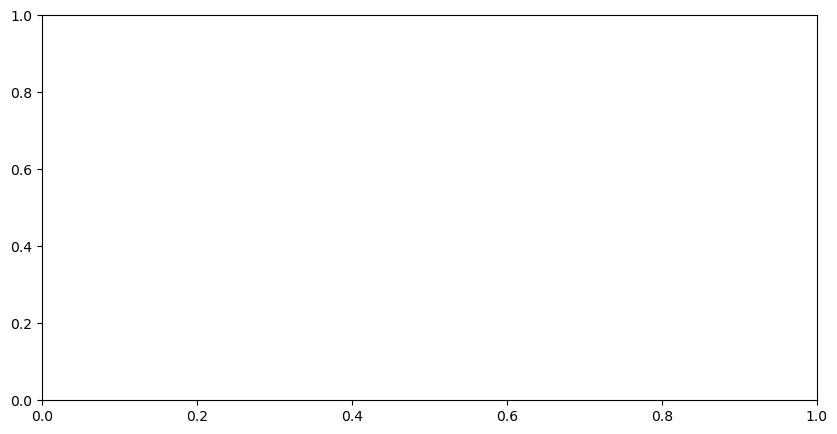

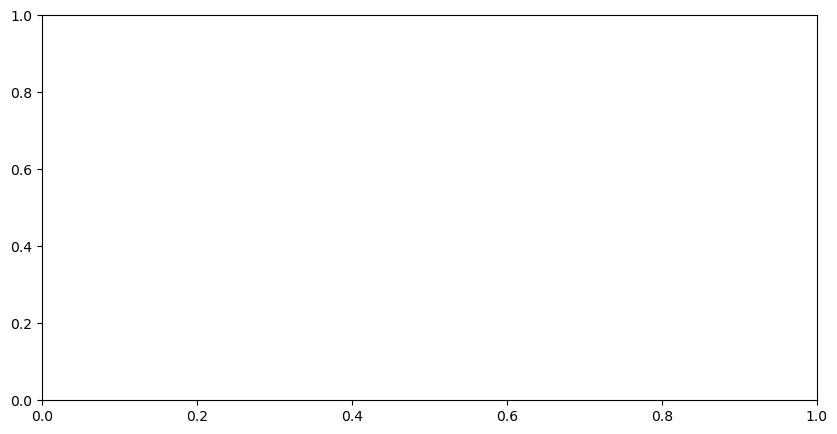

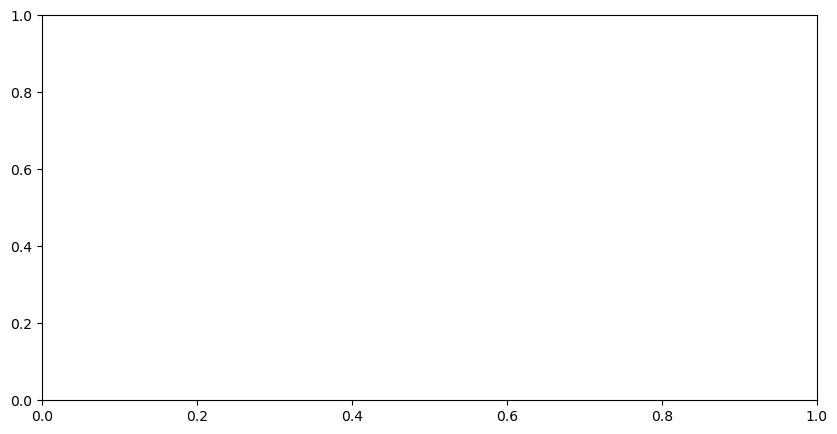

In [18]:
%%time
ly=4
dnx=60
dnys=[0,5,10,15,20]
widths=np.arange(10, 60+1)
for j, dny in enumerate(dnys):
    exec("err_list{}=[]".format(j))
    ## Configurate dust object
    layer=ly
    NA=layer*layer
    center_nx = int(N[0]/2 +dnx)
    center_ny = int(N[1]/2 +dny)
    obj = QOobject(NA, layer, Dj, omega_j, N, L, center_nx, center_ny, angle=90)

    ## Initialization
    qosim = QOsimulator(N, L, dt, beam=beam, objects=[obj])
    init_phi = qosim.gen_initial_state()

    ## Time evolution
    for i in range(int(t_max/dt)+1):
        t = i*dt
        if i == 0:
            phi = copy.deepcopy(init_phi)
        else:
            phi = qosim.suzuki_trotter_step(phi)

    ## Error rate
    for wid in widths:
        mat = detect_mat(N,80,wid)
        density = phi.ph.partial_density(_in="r")
        masked_density = mat*density
        exec("err_list{}.append({})".format(j,1-np.sum(masked_density)))

    exec("err_list{} = np.array(err_list{})".format(j,j))

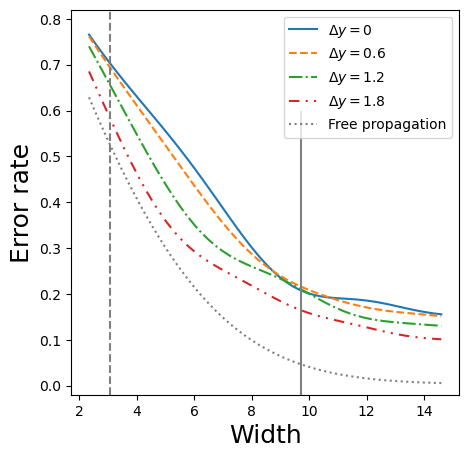

In [20]:
plt.figure(figsize=(5,5))
widths_r = (2*widths-1) / N[0]*L[0]
plt.plot(widths_r, err_list0, label=r"$\Delta y = 0$")
plt.plot(widths_r, err_list1, ls="--", label=r"$\Delta y = 0.6$")
plt.plot(widths_r, err_list2, ls="-.", label=r"$\Delta y = 1.2$")
plt.plot(widths_r, err_list3, ls=(0, (5, 3, 1, 3, 1, 3)), label=r"$\Delta y = 1.8$")
# plt.plot(widths_r, err_list4, ls="--", label=r"$\Delta y = 2.5$")
##
plt.plot(widths_r, err_list_free, ls=":", c="gray", label="Free propagation")
##
plt.vlines(3.07,-0.02,0.82, color="gray", ls="--")
plt.vlines(9.7,-0.02,0.6, color="gray", ls="-")
plt.ylim(-0.02,0.82)
plt.xlabel("Width", fontsize=18)
plt.ylabel("Error rate", fontsize=18)
plt.legend()
# plt.savefig("fig/err_rate_diff_Ny_at_Nx-60.eps", bbox_inches="tight")